# Introduction into matplotlib.pyplot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('mpl_styles/example1.mplstyle')

## Using matplotlib pyplot
For quick plotting we can directly use the matplotlib.pyplot functions. The different available plots can be found in the [matplotlib documentation](https://matplotlib.org/stable/plot_types/index.html).

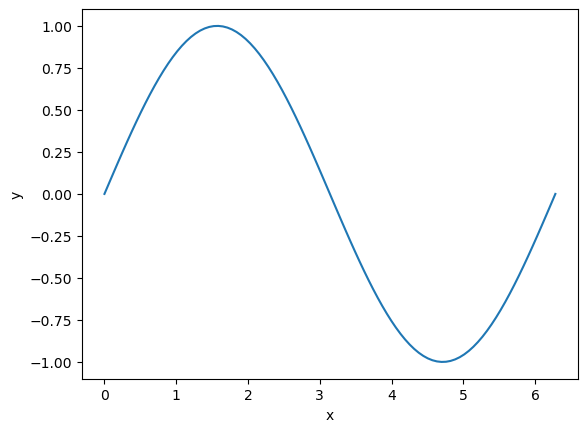

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Usually I would always use subplots
Still, the different available plots can be found in the [matplotlib documentation](https://matplotlib.org/stable/plot_types/index.html).

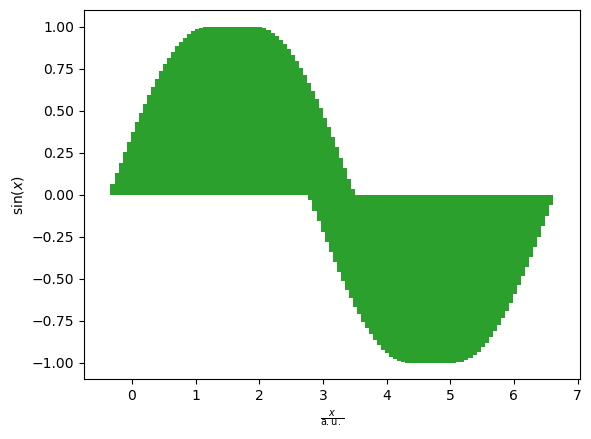

In [3]:
fig, ax = plt.subplots()

ax.bar(x, y, color='C2')
ax.set_xlabel(r'$\frac{x}{\mathrm{a.u.}}$')
ax.set_ylabel(r'$\sin(x)$')

plt.show()


## If there are multiple plots using subplots is usually the better idea

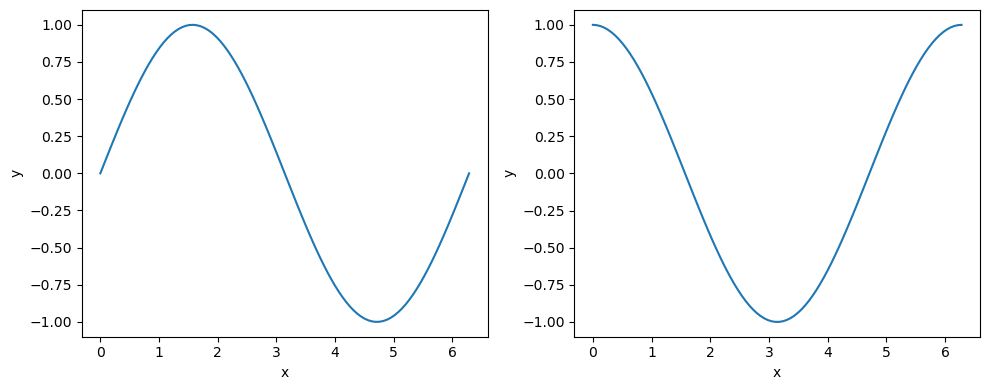

In [4]:
x = np.linspace(0, 2*np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].plot(x, y_sin, label='sin(x)')
axes[1].plot(x, y_cos, label='cos(x)')

for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

#ax.legend()
fig.tight_layout()

plt.show()

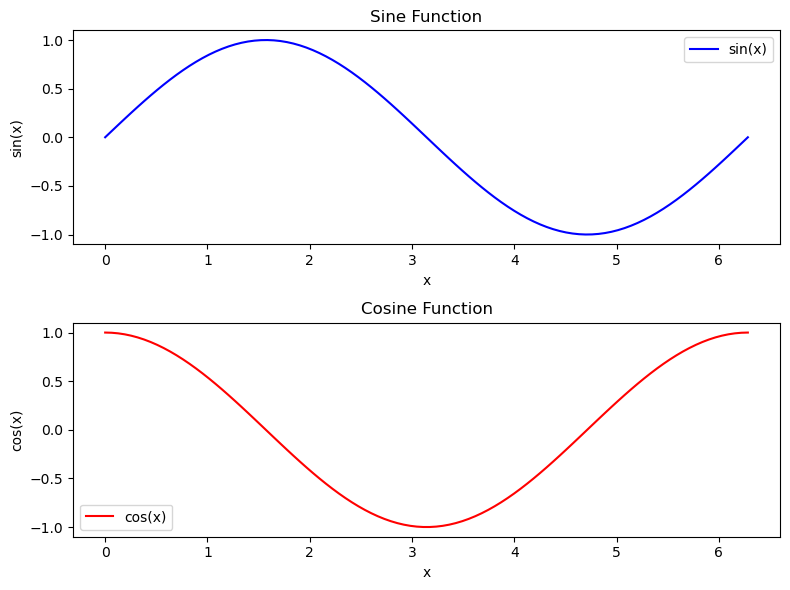

In [5]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot the data on the subplots
axs[0].plot(x, y1, color='blue', label='sin(x)')
axs[1].plot(x, y2, color='red', label='cos(x)')

# Set titles and labels for each subplot
axs[0].set_title('Sine Function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('sin(x)')
axs[1].set_title('Cosine Function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('cos(x)')

# Add legends to the subplots
axs[0].legend()
axs[1].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


## Exercise 1 
We can use [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) for a simple linear regression. Use this to visualise and fit [Anscombe's quartett](https://www.tandfonline.com/doi/abs/10.1080/00031305.1973.10478966) using the data located in `exercise_data/anscombe.json`.
Visualise the points as scatter plots and show the regression line. Give labels to the axes and try to vary the colors of the individual components. If you want you can also create a separate plot for the fitting statistics.

In [6]:
import json
with open('exercise_data/anscombe.json', 'r') as fobj:
    data = json.load(fobj)

data['dataset1']['x']

[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]

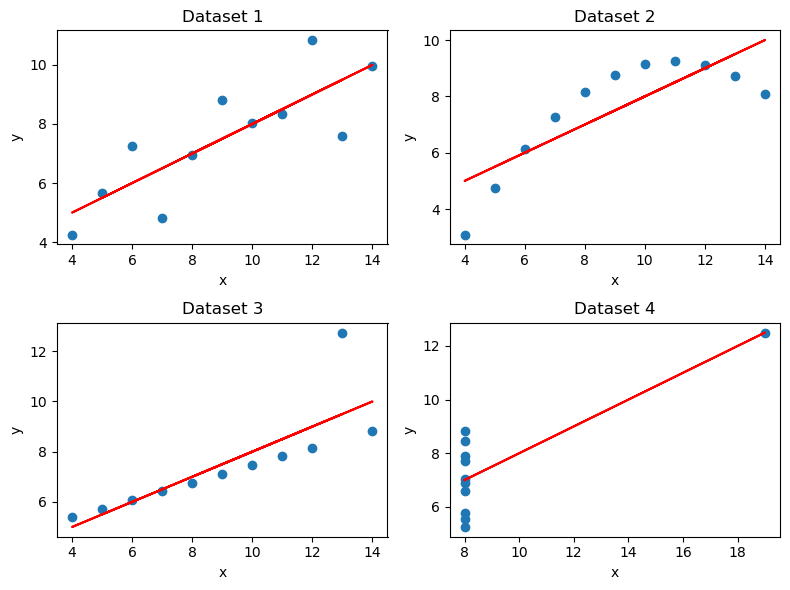

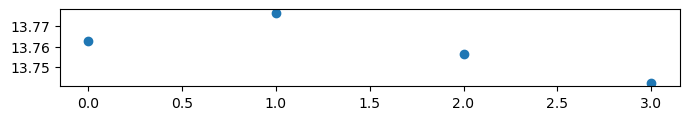

In [7]:
import json

with open('exercise_data/anscombe.json', 'r') as file:
    data_dict = json.load(file)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 1))

for i, ax in enumerate(axs.flat):
    data = data_dict[f'dataset{i+1}']
    x = np.array(data['x'])
    y = np.array(data['y'])
    ax.scatter(x, y)
    ax.set_title(f'Dataset {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    x_fit, residuals, *_ = np.polyfit(x, y, 1, full=True)
    y_fit = np.polyval(x_fit, x)
    ax.plot(x, y_fit, color='red')
    ax2.scatter(i, residuals, color='C0')
fig.tight_layout()



## Encoding information
We can encode information in different ways. The three ways are: position, [color](https://matplotlib.org/stable/users/explain/colors/colormaps.html) and size.

In [8]:
# Generate random data
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)


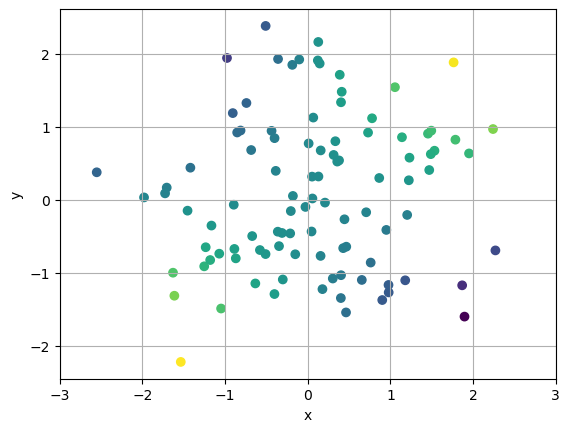

In [9]:
fig, ax = plt.subplots()


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.scatter(x, y, c=x*y, cmap='viridis')#, s=np.abs(x*y)*10)
ax.set_xlim([-3, 3])


plt.show()

c:\Users\vzmc42\.conda\envs\teaching_data_analysis\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


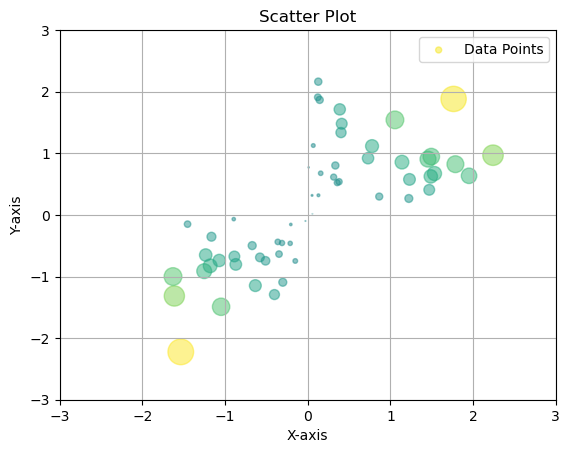

In [10]:

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(
    x, y, c=x * y* 100, marker='o',
    s=x * y* 100,
    alpha=0.5
)

# Set plot title and labels
ax.set_title('Scatter Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Customize plot appearance
ax.grid(True)
ax.legend(['Data Points'])
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# Show the plot
plt.show()

# Plotting categorical data

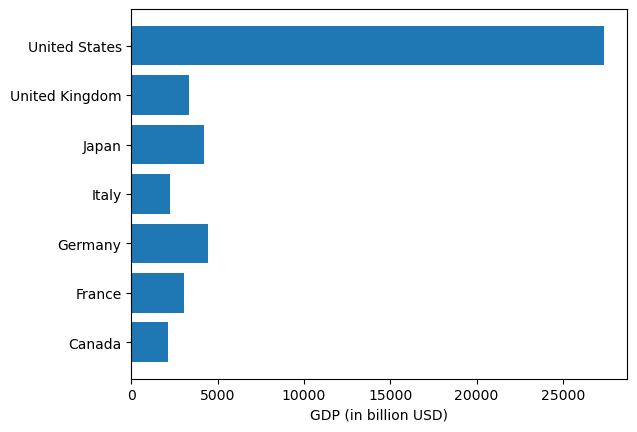

In [11]:
country, gdp = np.loadtxt('data/GDP_G7.csv', unpack=True, dtype='<U15,float64', delimiter=',')
fig, ax = plt.subplots()
#ax.bar(country, gdp)
#ax.set_xticklabels(country, rotation=90)

ax.barh(country, gdp)

ax.set_xlabel('GDP (in billion USD)')
plt.show()

Speaker Notes:
 - Labels usually get very long, we can rotate them
 - Usually the nicer option is a horizontal bar chart.

## If there is no inherent reason to sort data a certain way, sort by size

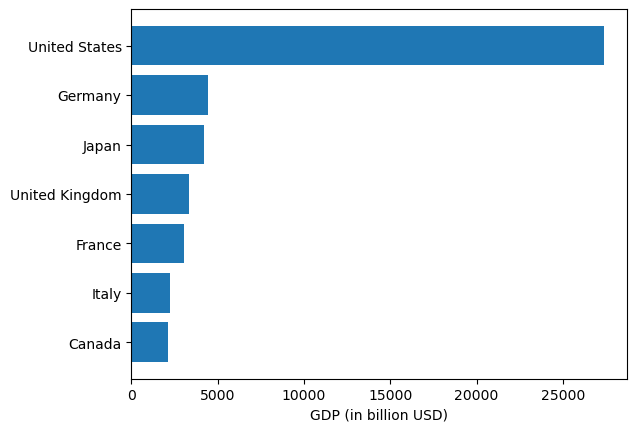

In [12]:
indexes = np.argsort(gdp)

fig, ax = plt.subplots()
ax.barh(country[indexes], gdp[indexes])
ax.set_xlabel('GDP (in billion USD)')
plt.show()

## We can also set styles using an mplstyle file

Why use a style file, if we can just copy options:
 - We can replot a graph for different purposes (talk, paper, grant application, thesis...).
 - If we have multiple notebooks for one paper, it is still easy to keep a consistent style and not forget to copy a redesign to "that one" graph.
 - Our notebooks will be less messy.



## There is different levels to applying a style
Apply globally to all following plots

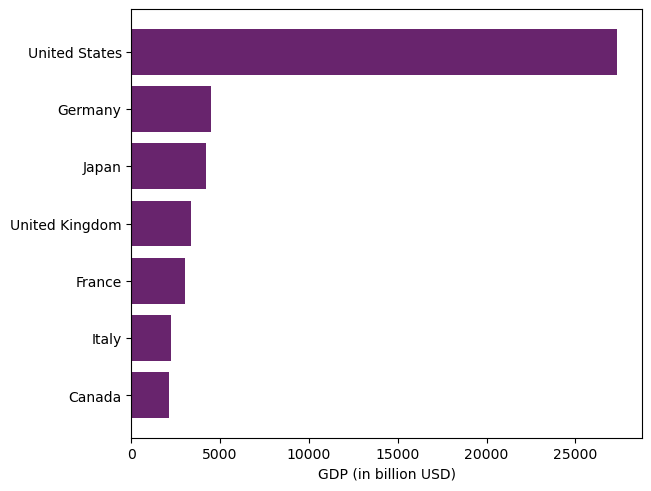

In [13]:
plt.style.use('mpl_styles/colors.mplstyle')

fig, ax = plt.subplots()
ax.barh(country[indexes], gdp[indexes])
ax.set_xlabel('GDP (in billion USD)')
plt.show()

# Apply to the plots in a context manager

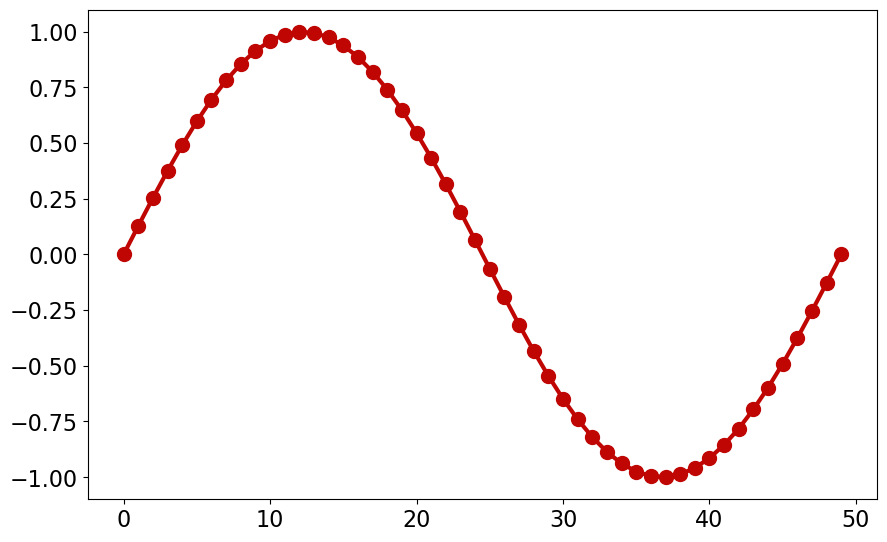

In [14]:
with plt.style.context(('mpl_styles/presentation.mplstyle')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'C1-o')

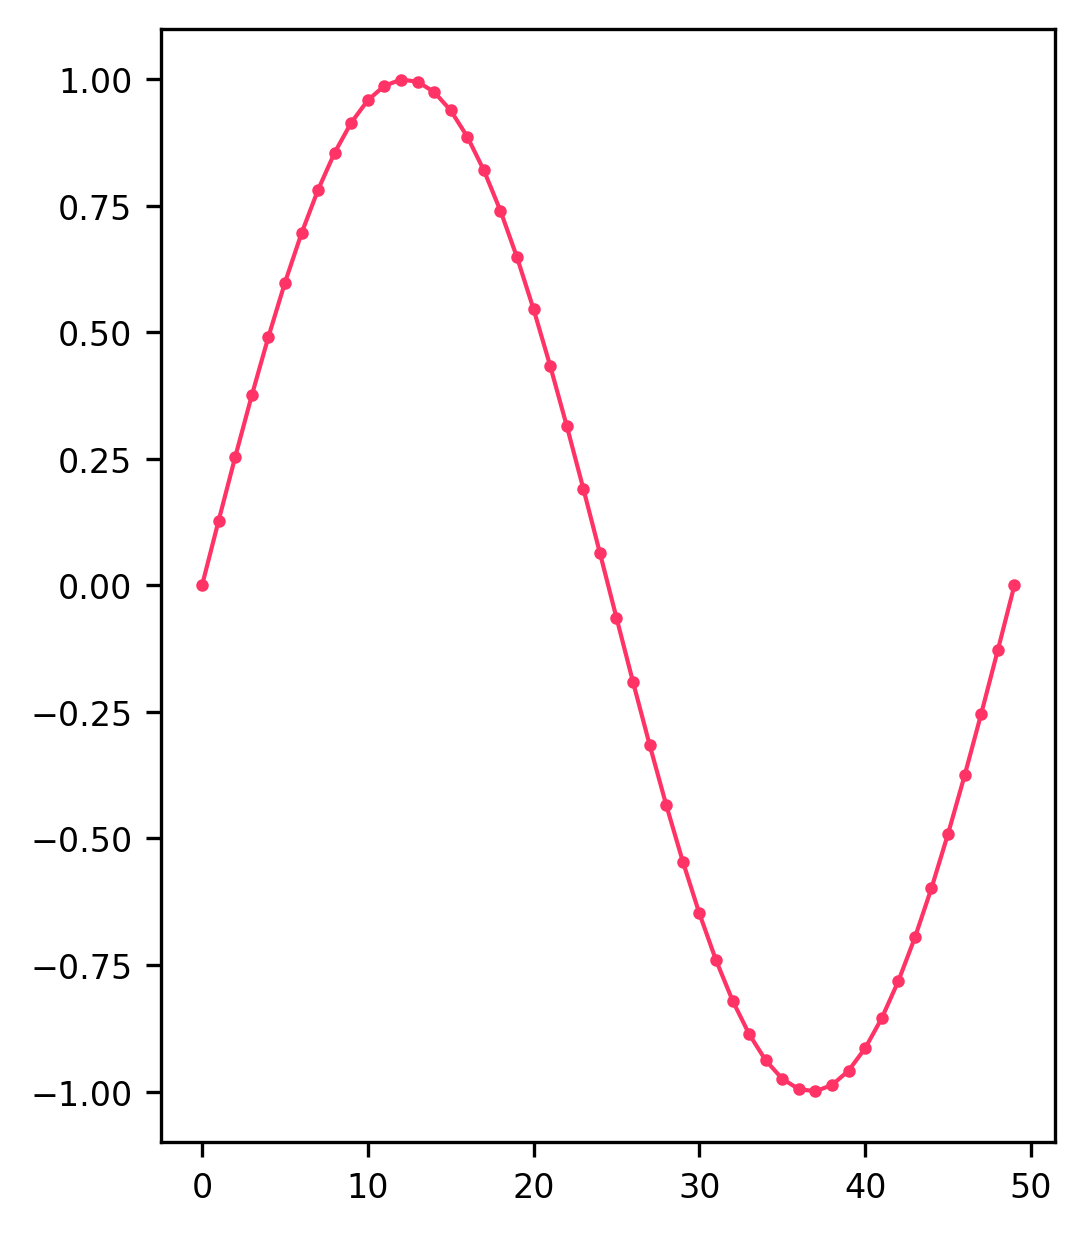

In [15]:
with plt.style.context(('mpl_styles/publication.mplstyle', 'mpl_styles/publication_onecolumn.mplstyle')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'C2-o')

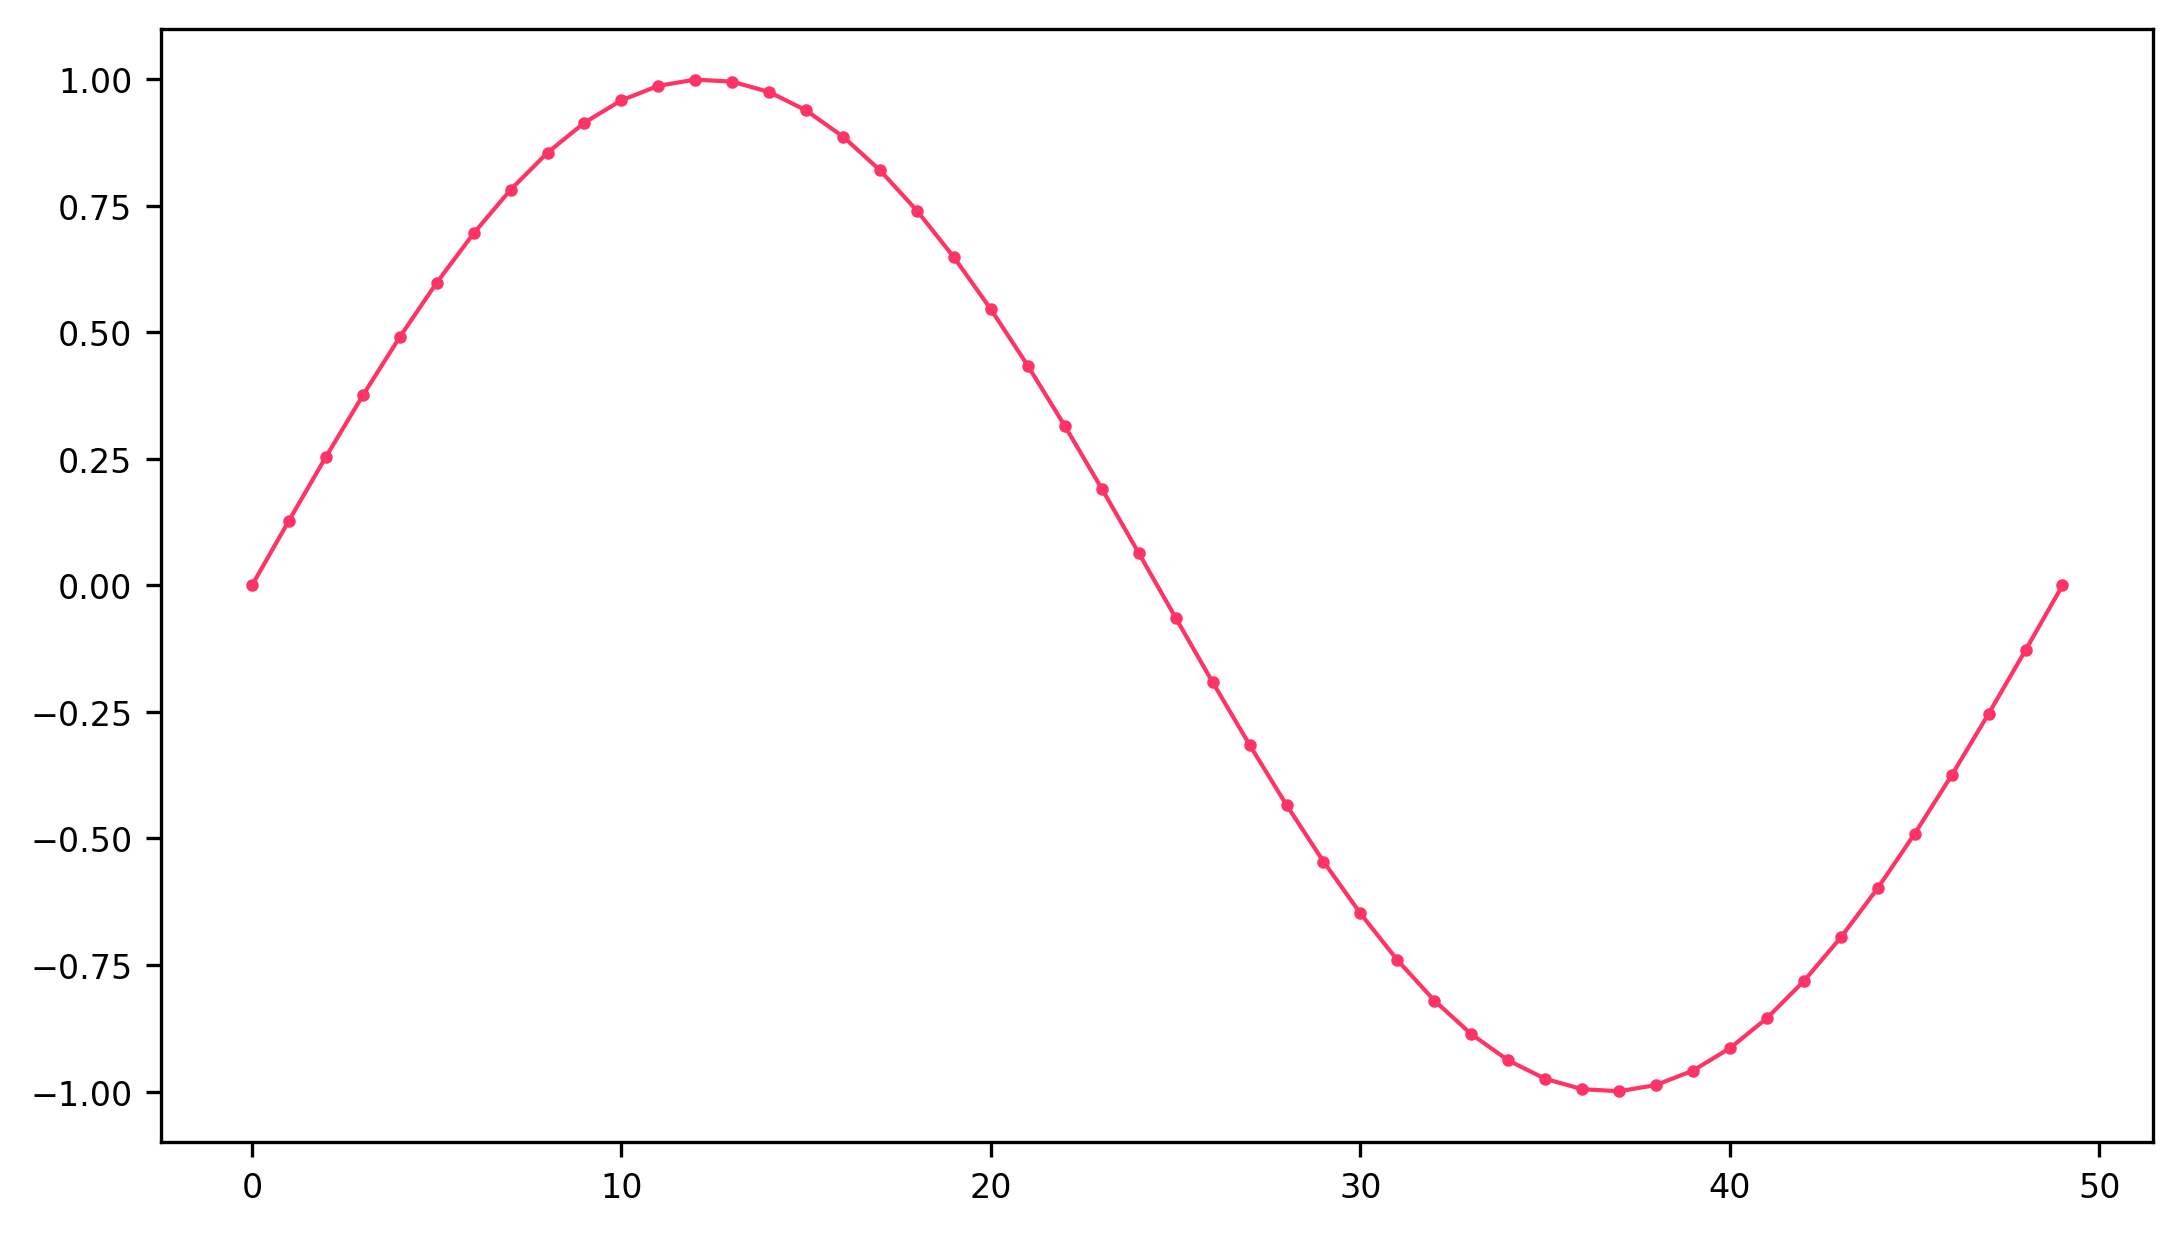

In [16]:
with plt.style.context(('mpl_styles/publication.mplstyle', 'mpl_styles/publication_twocolumn.mplstyle')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'C2-o')

# Exercise 2: Create your own style.
Task 1: Create a mock of graphs from your field

Create a selection of graphs using `np.linspace`, `np.random.rand` and the numpy functions that are somewhat representative of a figure you might publish.

Task 2: Try to build a presentation style and a publication style that fits your needs

Available options can be found [here](https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc). 

# Exporting figures
Matplotlib figures can be exported using the savefig command. Ususaly available formats are: png, pdf, ps, eps and svg.

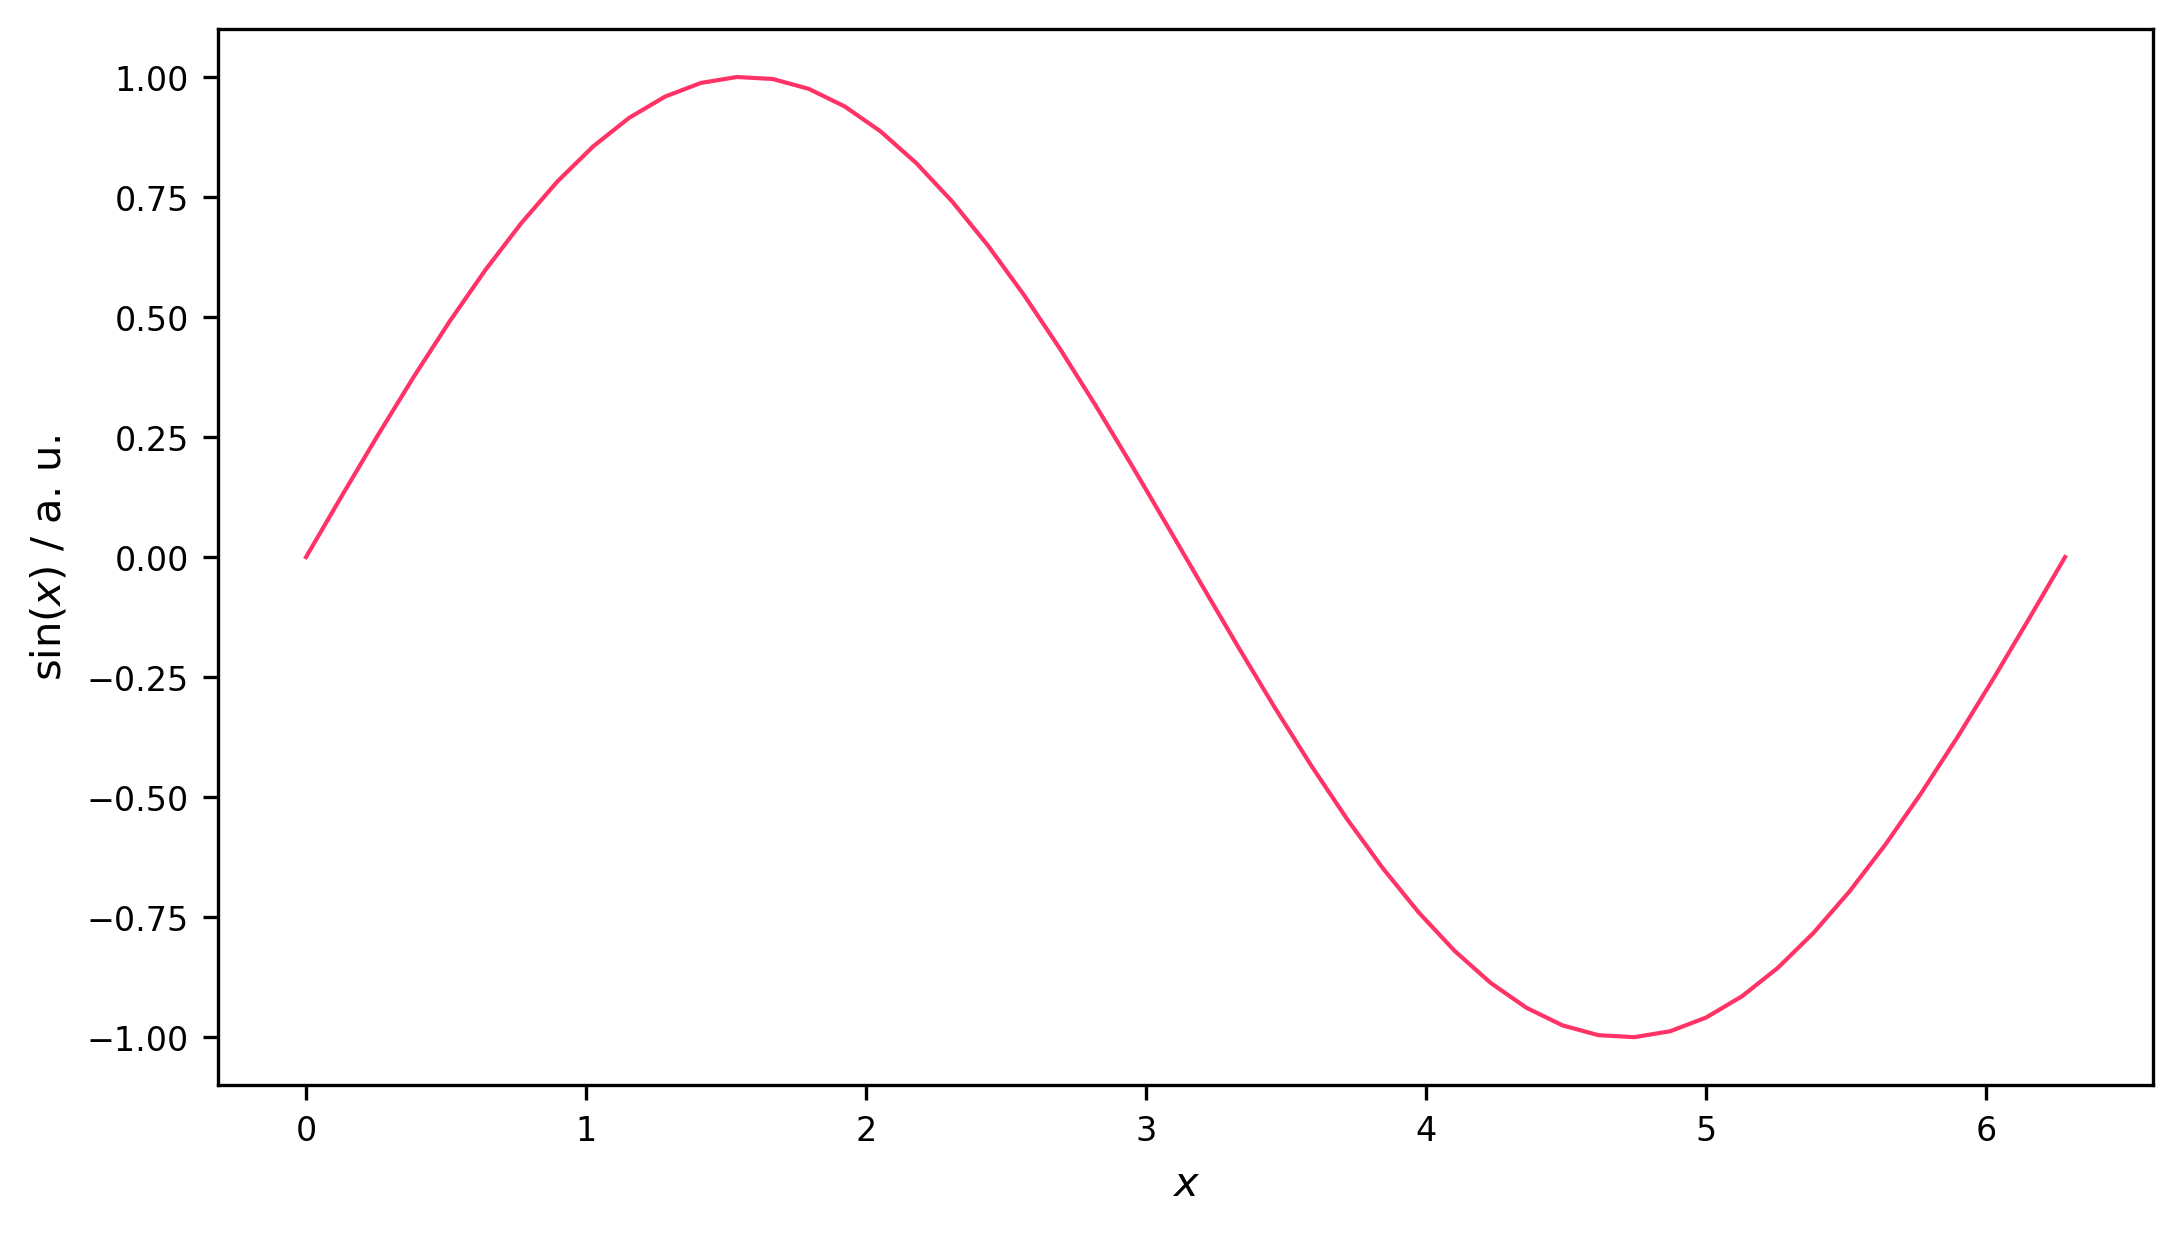

In [20]:
with plt.style.context(('mpl_styles/publication.mplstyle', 'mpl_styles/publication_twocolumn.mplstyle')):
    fig, ax = plt.subplots()
    x = np.linspace(0, 2 * np.pi)
    ax.plot(x, np.sin(x), 'C2')
    ax.set_xlabel('$x$')
    ax.set_ylabel(r'$\sin(x)$ / a. u.')

    fig.savefig('matplotlib_output.svg')


Speaker notes
 - If not set by a style or in the figure creation you should set the dpi value here
 - If some of your output is cropped, try `bbox_inches='tight'`

# Summary:
 - Matplotlib can be used to generate plots
 - We can style these plots using mplstyle files
 - Adapt your figures to your use case.